# Data Assimilation and Visualization


## Simple plotting

We have already mentioned that Python is not specifically a scientific programming language. Some users who may be familiar with systems like Matlab and IDL are rather surprised to find that typing plot(somedata) directly into a Python prompt does not work. We have to import the right libraries in order to do this.

The wonderful Matplotlib library let's us create lots of types of plot in a Matlab-like syntax (see the Matplotlib gallery for some examples). This is what we're going to use in this lesson, and for the rest of the practical, although other libraries are available too (see Further Reading below).

### Objectives
1. To create simple line plots and contour plots using Python, Numpy and Matplotlib
2. To read data from text-based tabular data files (e.g. CSV)

### A simple line plot

Before we can do any plotting we need to import the matplotlib code. The most common way to do this is like this:

In [1]:
import matplotlib.pyplot as plt

Don't worry about the syntax here. You can find more details about how to import libraries in Python here if you wish.

As we've mentioned, these notes are written in the IPython Notebook system. We need to add one line of "magic" in order to get plotting to work within this notebook, but you don't have to add this line to any Python scripts. So you can ignore this line for today:

In [2]:
%matplotlib inline

Let's create a simple line plot:

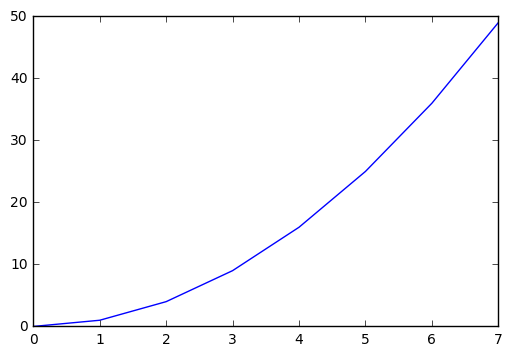

In [3]:
plt.plot([0,1,4,9,16,25,36,49])
plt.show()

The numbers between the square brackets form a list in Python.

This code can be run as a (three-line) script: load up simpleplot.py in your text editor and run it.

## Introducing Numpy arrays

In scientific programming it's very common to need to manipulate and plot arrays of numbers. It's possible to use Python's own lists for this purpose (as in the program above), but these can be inconvenient (and slow) for large or multidimensional arrays. The Numpy library is very commonly used for this.

We import Numpy like this:

In [4]:
import numpy as np

Let's create a Numpy array containing the numbers from 0 to 9 inclusive. These will form the x values of our next plot:

In [6]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


Now let's create the y values by squaring each of the x values:

In [7]:
y = x**2
print(y)

[ 0  1  4  9 16 25 36 49 64 81]


Now we can create a new plot using these x and y values. We'll also label the axes and give the plot a title.

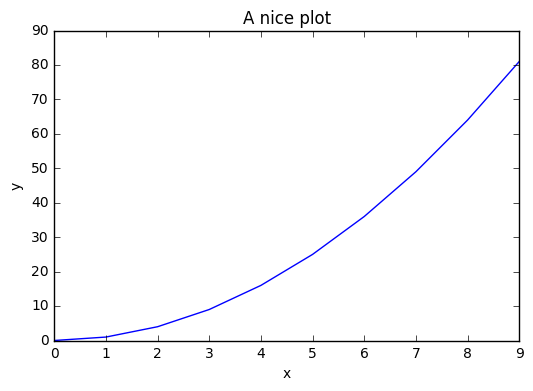

In [8]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('A nice plot')
plt.show()

Fairly straightforward, yes? You can find a runnable script that does this in nparr.py. You can change the colour and style of the line: for example, to plot a red dashed line you can use plt.plot(x,y,'r--'). Edit the script and try it!

## Plotting data from tables and spreadsheets

It is very common to need to plot data that are stored in tabular form, e.g. in spreadsheets or CSV (comma-separated value) files. Data are given as plain (ASCII) text, with each data value separated by commas, spaces or some other delimiter.

We have provided some sample output from the DALEC model in the data folder that accompanies these notes. The file dalec_example_CF_DA.csv contains comma-separated values of carbon in foliage after assimilating lots of field data [www.met.reading.ac.uk](http://www.met.reading.ac.uk/). There are 200 columns in the data file, each representing a particular experiment - each experiment has a value of carbon for each of 1096 model days. Open the file in your text editor to see what it looks like.

Numpy and Matplotlib make it very easy to work with these files. We can read in the data using a single command:

In [9]:
carbon = np.genfromtxt('./data/simple plotting/dalec_example_CF_DA.csv', delimiter=',')

That's all! Now the variable carbon contains a 2D Numpy array of data:

In [10]:
carbon.shape

(1096, 200)

We can get the results of the ith experiment (out of 200) by using Numpy's array slice syntax: carbon[:,i] (meaning "all the values in the first dimension, but the ith value of the second dimension). Let's get the data for the 10th experiment (recalling that Python arrays start at zero so the experiment with index 9 is in fact the 10th experiment):

In [11]:
exp9 = carbon[:,9]

And of course we can plot it:

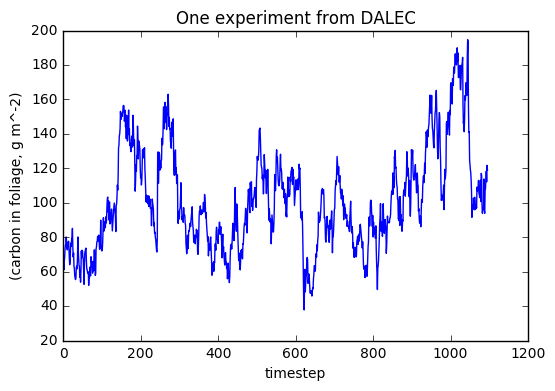

In [12]:
plt.plot(exp9)
plt.title('One experiment from DALEC')
plt.ylabel('(carbon in foliage, g m^-2)')
plt.xlabel('timestep')
plt.show()

Let's say we wanted to investigate the variability of carbon values among the 200 model runs. We can create an array of values from each model run at a particular timestep, say the timestep with index 600. We can slice the 2D array of carbon values in a different way:

In [13]:
values = carbon[600,:]

Now the variable values contains 200 values of carbon, one from each model run. We can plot a histogram of these values with eight bins:

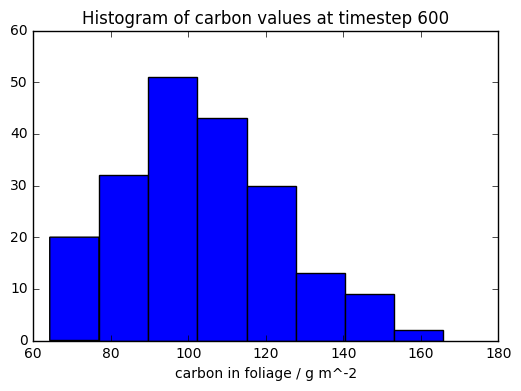

In [14]:
plt.hist(values,8)
plt.title('Histogram of carbon values at timestep 600')
plt.xlabel('carbon in foliage / g m^-2')
plt.show()

## Plotting two-dimensional data

To plot two-dimensional data (i.e. z = f(x,y)) we follow the same general idea. Firstly, we'll create a 2D array of data. There are various ways to do this, but we'll start by creating x and y values; eleven of each ranging from -1 to +1:

In [15]:
x = np.linspace(-1,1,11)
y = np.linspace(-1,1,11)

We'll now create a grid from these x and y values, then create a 2D array of Z values. Don't worry if you don't quite follow what is happening here. (You can find out more about the meshgrid function [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).)

In [16]:
X, Y = np.meshgrid(x,y)
Z = np.cos(X) * np.cos(Y)

Now we can create a filled contour plot from the data (using 20 contour values), add x and y axis labels and a title, and finally a colour bar:

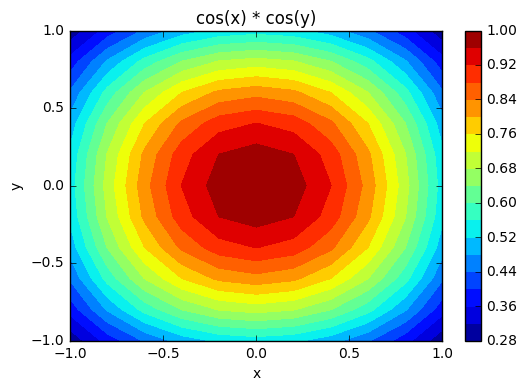

In [17]:
plt.contourf(x,y,Z,20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('cos(x) * cos(y)')
plt.colorbar()
plt.show()